In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import keras
import tensorflow_hub as hub
import pathlib
import os, shutil

from tensorflow.keras import layers

TensorFlow 2.x selected.


Using TensorFlow backend.


## Download the Pretrained Classifier

Via Tensorflow Hub

In [6]:
# Image information
HEIGHT = 224
WIDTH = 224
CHANNELS = 3

classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" #@param {type:"string"}


model = tf.keras.Sequential([
  hub.KerasLayer(classifier_url, input_shape=(HEIGHT, WIDTH, CHANNELS)),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               256512    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 3,797,034
Trainable params: 256,769
Non-trainable params: 3,540,265
_________________________________________________________________


In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

## Download the Data

In [0]:
URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname="cats_and_dogs_filtered.zip", 
                                   extract=True)
base_dir, _ = os.path.splitext(zip_file)

In [9]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print ('Total training cat images:', len(os.listdir(train_cats_dir)))

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print ('Total training dog images:', len(os.listdir(train_dogs_dir)))

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print ('Total validation cat images:', len(os.listdir(validation_cats_dir)))

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print ('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


## Preprocess the Data

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(HEIGHT, WIDTH),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(HEIGHT, WIDTH),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit the Model

In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10


W0820 10:54:12.116090 139832514119552 deprecation.py:323] From /tensorflow-2.0.0b1/python3.6/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100/100 - 164s - loss: 0.1835 - acc: 0.9430 - val_loss: 0.0673 - val_acc: 0.9770
Epoch 2/10
100/100 - 149s - loss: 0.0889 - acc: 0.9640 - val_loss: 0.0539 - val_acc: 0.9850
Epoch 3/10
100/100 - 150s - loss: 0.0595 - acc: 0.9760 - val_loss: 0.0435 - val_acc: 0.9880
Epoch 4/10
100/100 - 150s - loss: 0.0623 - acc: 0.9795 - val_loss: 0.0550 - val_acc: 0.9790
Epoch 5/10
100/100 - 150s - loss: 0.0500 - acc: 0.9850 - val_loss: 0.0701 - val_acc: 0.9770
Epoch 6/10
100/100 - 150s - loss: 0.0379 - acc: 0.9870 - val_loss: 0.0709 - val_acc: 0.9830
Epoch 7/10
100/100 - 150s - loss: 0.0407 - acc: 0.9855 - val_loss: 0.0645 - val_acc: 0.9830
Epoch 8/10
100/100 - 150s - loss: 0.0424 - acc: 0.9865 - val_loss: 0.0709 - val_acc: 0.9760
Epoch 9/10
100/100 - 149s - loss: 0.0238 - acc: 0.9920 - val_loss: 0.0517 - val_acc: 0.9860
Epoch 10/10
100/100 - 149s - loss: 0.0327 - acc: 0.9925 - val_loss: 0.0623 - val_acc: 0.9850


## Visualisation

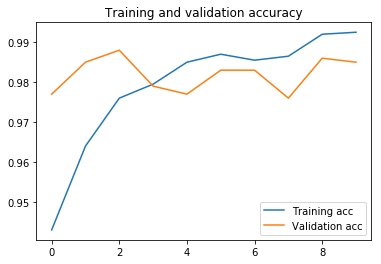

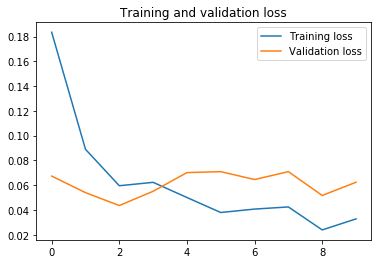

In [12]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and test datasets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test datasets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']


# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()